In [2]:
from music21 import *

In [3]:
import numpy as np

In [4]:
import pathlib

In [5]:
import tensorflow as tf

In [6]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)


In [7]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

59243107/59243107 [==============================] - 1s 0us/step


In [8]:
notes = read_midi('/content/data/maestro-v2.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi')

Loading Music File: /content/data/maestro-v2.0.0/2004/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi


In [9]:
path = '/content/data/maestro-v2.0.0/2018/'

In [10]:
import os
files=[i for i in os.listdir(path) if i.endswith(".midi")]

In [11]:
files

['MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi',
 'MIDI-Unprocessed_Recital5-7_MID--AUDIO_05_R1_2018_wav--3.midi',
 'MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--3.midi',
 'MIDI-Unprocessed_Recital5-7_MID--AUDIO_05_R1_2018_wav--2.midi',
 'MIDI-Unprocessed_Schubert4-6_MID--AUDIO_09_R2_2018_wav.midi',
 'MIDI-Unprocessed_Recital13-15_MID--AUDIO_14_R1_2018_wav--1.midi',
 'MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--2.midi',
 'MIDI-Unprocessed_Schubert1-3_MID--AUDIO_05_R2_2018_wav.midi',
 'MIDI-Unprocessed_Recital8_MID--AUDIO_08_R1_2018_wav--1.midi',
 'MIDI-Unprocessed_Recital13-15_MID--AUDIO_15_R1_2018_wav--1.midi',
 'MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--5.midi',
 'MIDI-Unprocessed_Recital17-19_MID--AUDIO_18_R1_2018_wav--1.midi',
 'MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--1.midi',
 'MIDI-Unprocessed_Recital17-19_MID--AUDIO_17_R1_2018_wav--2.midi',
 'MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--2.midi'

In [12]:
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital5-7_MID--AUDIO_05_R1_2018_wav--3.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--3.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital5-7_MID--AUDIO_05_R1_2018_wav--2.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Schubert4-6_MID--AUDIO_09_R2_2018_wav.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_14_R1_2018_wav--1.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--2.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed_Schubert1-3_MID--AUDIO_05_R2_2018_wav.midi
Loading Music File: /content/data/maestro-v2.0.0/2018/MIDI-Unprocessed

<ipython-input-12-d3b9f39eb4b3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(path+i) for i in files])


In [13]:
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

1771


(array([1618.,   39.,   34.,   23.,   22.,    9.,    5.,    9.,    7.,
           5.]),
 array([1.0000e+00, 8.0840e+02, 1.6158e+03, 2.4232e+03, 3.2306e+03,
        4.0380e+03, 4.8454e+03, 5.6528e+03, 6.4602e+03, 7.2676e+03,
        8.0750e+03]),
 <BarContainer object of 10 artists>)

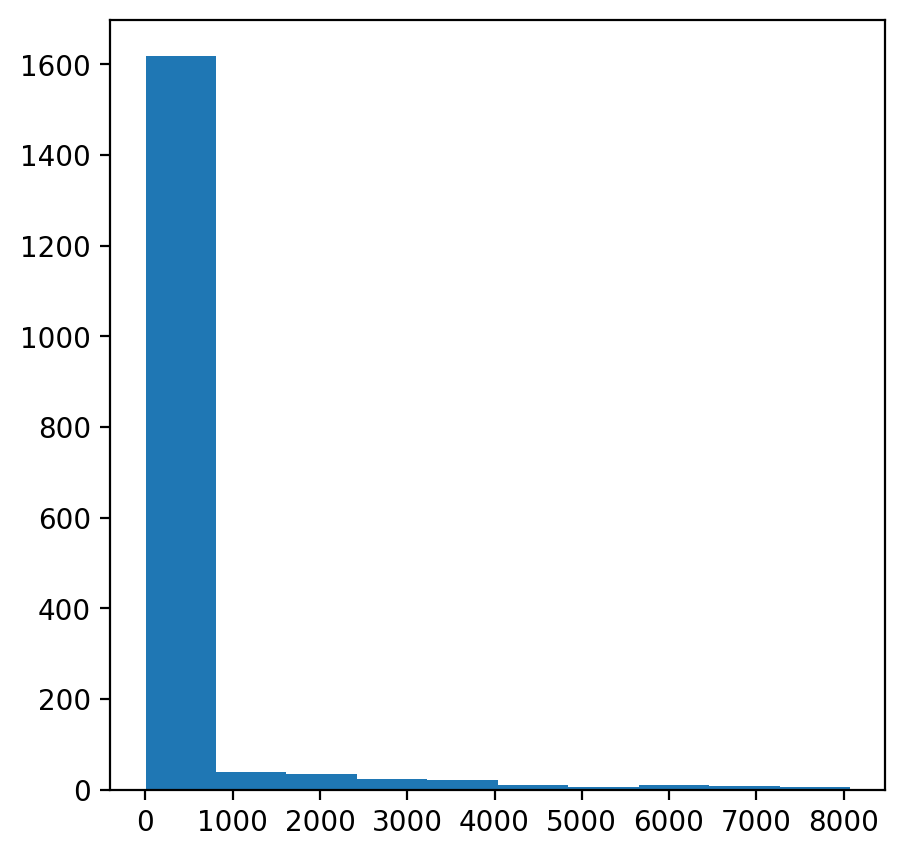

In [14]:

#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [15]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

424


In [16]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

<ipython-input-16-2fa7923ce1b3>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [17]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [18]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [19]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [20]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [22]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.1))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.1))
model.add(MaxPool1D(2))

model.add(Conv1D(512,3,activation='relu',dilation_rate=8,padding='causal'))
model.add(Dropout(0.1))
model.add(MaxPool1D(2))
            
model.add(GlobalMaxPool1D())
    
model.add(Dense(512, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           42400     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [23]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [24]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=15, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/15
3232/3232 [==============================] - ETA: 0s - loss: 4.8102
Epoch 1: val_loss improved from inf to 4.58014, saving model to best_model.h5
3232/3232 [==============================] - 56s 14ms/step - loss: 4.8102 - val_loss: 4.5801
Epoch 2/15
3232/3232 [==============================] - ETA: 0s - loss: 4.4667
Epoch 2: val_loss improved from 4.58014 to 4.41568, saving model to best_model.h5
3232/3232 [==============================] - 28s 9ms/step - loss: 4.4667 - val_loss: 4.4157
Epoch 3/15
3232/3232 [==============================] - ETA: 0s - loss: 4.3351
Epoch 3: val_loss improved from 4.41568 to 4.32160, saving model to best_model.h5
3232/3232 [==============================] - 28s 9ms/step - loss: 4.3351 - val_loss: 4.3216
Epoch 4/15
3226/3232 [============================>.] - ETA: 0s - loss: 4.2594
Epoch 4: val_loss improved from 4.32160 to 4.27542, saving model to best_model.h5
3232/3232 [==============================] - 28s 9ms/step - loss: 4.2594 - val_loss

In [25]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [63]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(25):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

1/1 [==============================] - 0s 20ms/step
[406, 406, 406, 338, 406, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338, 338]


In [64]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [65]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')


In [ ]:
convert_to_midi(predicted_notes)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [66]:
def plot_learning(history, tgt='loss', val_tgt='val_loss', ylab='error'):
    plt.plot(history.history[tgt], label=tgt)
    plt.plot(history.history[val_tgt], label=val_tgt)
    plt.xlabel('Epoch')
    plt.ylabel(ylab)
    plt.legend()

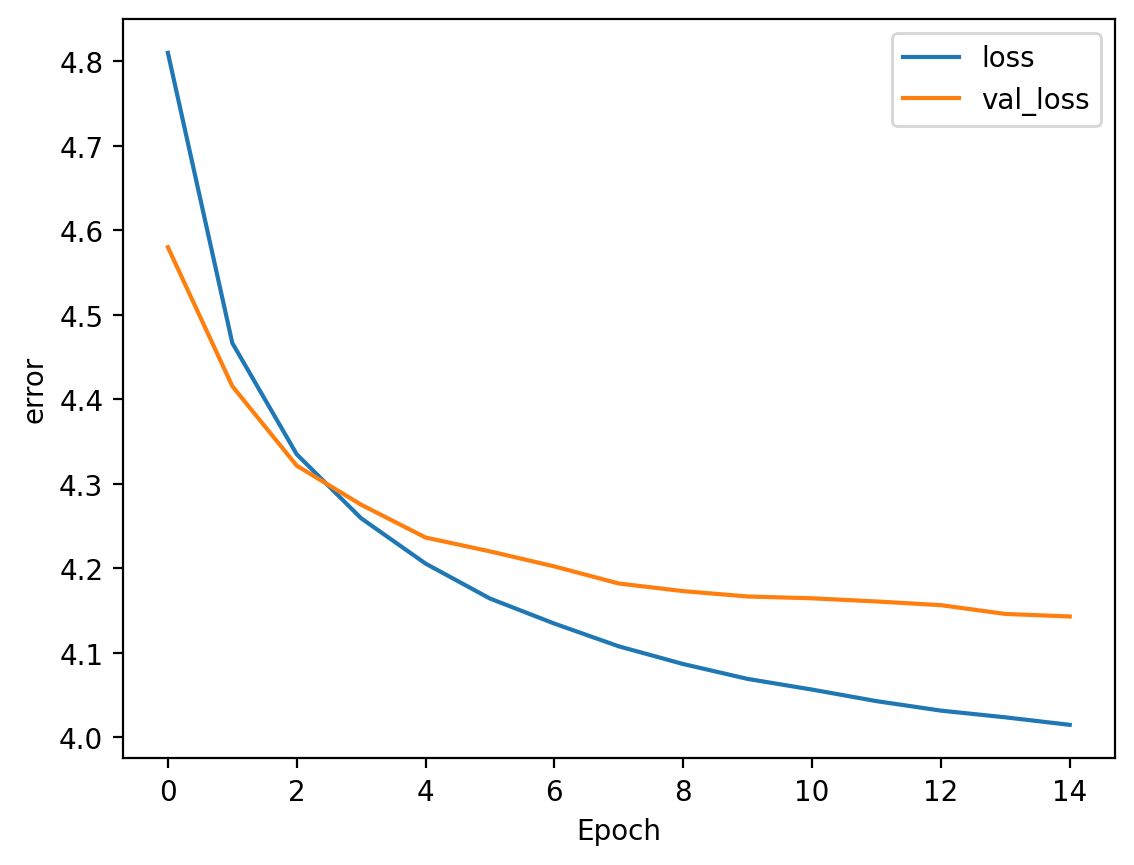

In [67]:
plot_learning(history)

In [68]:
K.clear_session()
model2 = Sequential()
    
#embedding layer
model2.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model2.add(Conv1D(64,3, padding='causal',activation='relu'))
model2.add(Dropout(0.1))
model2.add(MaxPool1D(2))
    
model2.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model2.add(Dropout(0.1))
model2.add(MaxPool1D(2))

#model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
#model.add(Dropout(0.1))
#model.add(MaxPool1D(2))

#model.add(Conv1D(512,3,activation='relu',dilation_rate=8,padding='causal'))
#model.add(Dropout(0.1))
#model.add(MaxPool1D(2))
            
model2.add(GlobalMaxPool1D())
    
model2.add(Dense(512, activation='relu'))
model2.add(Dense(len(unique_y), activation='softmax'))
    
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           42400     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [69]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [71]:
history = model2.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=15, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/15
3226/3232 [============================>.] - ETA: 0s - loss: 4.6676
Epoch 1: val_loss improved from inf to 4.47680, saving model to best_model.h5
3232/3232 [==============================] - 35s 10ms/step - loss: 4.6674 - val_loss: 4.4768
Epoch 2/15
3224/3232 [============================>.] - ETA: 0s - loss: 4.3782
Epoch 2: val_loss improved from 4.47680 to 4.35980, saving model to best_model.h5
3232/3232 [==============================] - 21s 6ms/step - loss: 4.3779 - val_loss: 4.3598
Epoch 3/15
3227/3232 [============================>.] - ETA: 0s - loss: 4.2776
Epoch 3: val_loss improved from 4.35980 to 4.29404, saving model to best_model.h5
3232/3232 [==============================] - 20s 6ms/step - loss: 4.2775 - val_loss: 4.2940
Epoch 4/15
3231/3232 [============================>.] - ETA: 0s - loss: 4.2139
Epoch 4: val_loss improved from 4.29404 to 4.26837, saving model to best_model.h5
3232/3232 [==============================] - 20s 6ms/step - loss: 4.2139 - val_loss

In [72]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [78]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(25):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

1/1 [==============================] - 0s 23ms/step
[286, 243, 286, 243, 286, 243, 286, 243, 286, 243, 286, 243, 286, 243, 286, 286, 286, 286, 286, 286, 286, 286, 117, 286, 117]


In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
convert_to_midi(predicted_notes)